In [1]:
#Import libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

In [2]:
#Import dataframe
df_mall = pd.read_csv('/kaggle/input/shopping-mall-customer-segmentation-data/Shopping Mall Customer Segmentation Data .csv')
df_mall.head(4)

,Customer ID,Age,Gender,Annual Income,Spending Score
0,d410ea53-6661-42a9-ad3a-f554b05fd2a7,30,Male,151479,89
1,1770b26f-493f-46b6-837f-4237fb5a314e,58,Female,185088,95
2,e81aa8eb-1767-4b77-87ce-1620dc732c5e,62,Female,70912,76
3,9795712a-ad19-47bf-8886-4f997d6046e3,23,Male,55460,57


In [3]:
#Dataset centrality measures
df_mall.describe()

,Age,Annual Income,Spending Score
count,15079.000000,15079.000000,15079.000000
mean,54.191591,109742.880562,50.591617
std,21.119207,52249.425866,28.726977
min,18.000000,20022.000000,1.000000
25%,36.000000,64141.000000,26.000000
50%,54.000000,109190.000000,51.000000
75%,72.000000,155008.000000,75.000000
max,90.000000,199974.000000,100.000000


In [4]:
#Type of variables in the dataset
df_mall.dtypes

Customer ID       object
Age                int64
Gender            object
Annual Income      int64
Spending Score     int64
dtype: object

In [5]:
df_gender = df_mall.groupby('Gender').agg({'Customer ID':'count'}).reset_index()

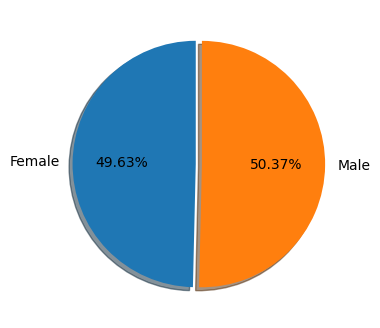

In [6]:
fig = plt.figure(figsize=[10,4])
ax = fig.add_subplot()
ax.pie(pd.Series(df_gender['Customer ID']), explode=(0,0.05), labels=df_gender['Gender'], 
       autopct='%1.2f%%', shadow=True, startangle=90)
plt.show()

In [7]:
#Check null values
df_mall.isnull().sum()

Customer ID       0
Age               0
Gender            0
Annual Income     0
Spending Score    0
dtype: int64

In [8]:
#Dataset dimension
df_mall.shape

(15079, 5)

In [9]:
#Check cardinality of the Gender variable
df_mall['Gender'].value_counts()

Gender
Male      7595
Female    7484
Name: count, dtype: int64

In [10]:
#Convert categorical variables
df_gender = pd.get_dummies(df_mall.Gender, dtype='int')
df_gender.head(4)

,Female,Male
0,0,1
1,1,0
2,1,0
3,0,1


In [11]:
#Combine df_gender with main dataframe
df_mall = pd.concat([df_mall, df_gender], axis=1)
df_mall.head(4)

,Customer ID,Age,Gender,Annual Income,Spending Score,Female,Male
0,d410ea53-6661-42a9-ad3a-f554b05fd2a7,30,Male,151479,89,0,1
1,1770b26f-493f-46b6-837f-4237fb5a314e,58,Female,185088,95,1,0
2,e81aa8eb-1767-4b77-87ce-1620dc732c5e,62,Female,70912,76,1,0
3,9795712a-ad19-47bf-8886-4f997d6046e3,23,Male,55460,57,0,1


In [12]:
#Convert numerics variables
scaler = MinMaxScaler()
scaler.fit(df_mall[['Annual Income','Spending Score']])
df_mall[['Annual Income','Spending Score']] = scaler.transform(df_mall[['Annual Income','Spending Score']])
df_mall.head(4)

,Customer ID,Age,Gender,Annual Income,Spending Score,Female,Male
0,d410ea53-6661-42a9-ad3a-f554b05fd2a7,30,Male,0.730511,0.888889,0,1
1,1770b26f-493f-46b6-837f-4237fb5a314e,58,Female,0.917278,0.949495,1,0
2,e81aa8eb-1767-4b77-87ce-1620dc732c5e,62,Female,0.282798,0.757576,1,0
3,9795712a-ad19-47bf-8886-4f997d6046e3,23,Male,0.196930,0.565657,0,1


In [13]:
df_by_score = df_mall.groupby(['Spending Score','Gender']).agg({'Male':'sum','Female':'sum','Annual Income':'mean'}).reset_index()
df_by_score.head()

,Spending Score,Gender,Male,Female,Annual Income
0,0.000000,Female,0,81,0.564924
1,0.000000,Male,71,0,0.528277
2,0.010101,Female,0,65,0.517811
3,0.010101,Male,74,0,0.499542
4,0.020202,Female,0,91,0.490960


In [14]:
'''
fig = plt.figure(figsize=[10,5])
ax = fig.add_subplot()
ax.scatter(df_by_score['Spending Score'], df_by_score['Male'], s=50, c='green')
ax.scatter(df_by_score['Spending Score'], df_by_score['Female'], s=50, c='blue')
ax.xlabel
'''

"\nfig = plt.figure(figsize=[10,5])\nax = fig.add_subplot()\nax.scatter(df_by_score['Spending Score'], df_by_score['Male'], s=50, c='green')\nax.scatter(df_by_score['Spending Score'], df_by_score['Female'], s=50, c='blue')\nax.xlabel\n"

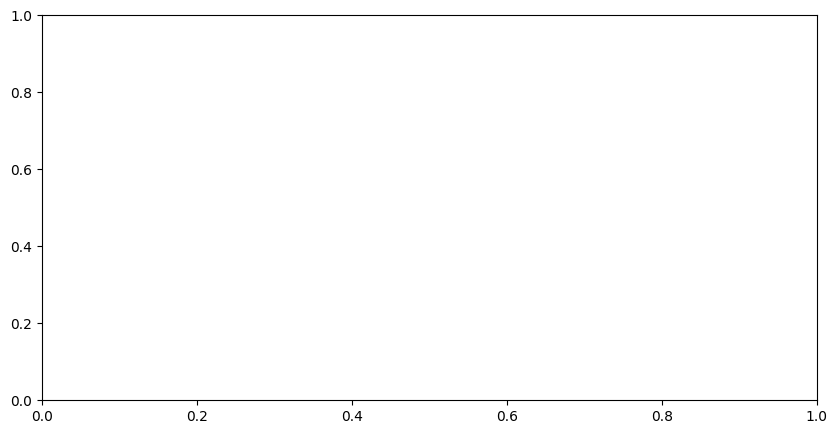

In [15]:
fig = plt.figure(figsize=[10,5])
ax = fig.add_subplot()


In [16]:
#Check correlation between variables
corr = df_mall[['Age','Annual Income','Spending Score','Female','Male']].corr()
corr

,Age,Annual Income,Spending Score,Female,Male
Age,1.000000,0.004776,-0.008251,-0.002034,0.002034
Annual Income,0.004776,1.000000,0.003234,0.003038,-0.003038
Spending Score,-0.008251,0.003234,1.000000,-0.006703,0.006703
Female,-0.002034,0.003038,-0.006703,1.000000,-1.000000
Male,0.002034,-0.003038,0.006703,-1.000000,1.000000


In [17]:
#Create explanatory variable
X = df_mall.drop(['Customer ID','Gender','Spending Score'], axis=1)
X.head(4)

,Age,Annual Income,Female,Male
0,30,0.730511,0,1
1,58,0.917278,1,0
2,62,0.282798,1,0
3,23,0.196930,0,1


In [18]:
#Create target variable
y = df_mall['Spending Score']
y.head()

0    0.888889
1    0.949495
2    0.757576
3    0.565657
4    0.757576
Name: Spending Score, dtype: float64

In [19]:
#Split dataset in train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [20]:
#Split training dataset in train and validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.20, random_state=42)

In [21]:
#Linear Regression and KNeighborsRegressor
reg = LinearRegression()
neigh = KNeighborsRegressor(n_neighbors=3)

In [22]:
#Fit the training data
reg_temp = reg.fit(X_train, y_train)
neigh_temp = neigh.fit(X_train, y_train)

In [23]:
#Predict the validation data
y_pred_reg = reg_temp.predict(X_val)
y_pred_neigh = neigh_temp.predict(X_val)

In [24]:
#Performance metric r2_score
r2_score_reg = r2_score(y_val, y_pred_reg)
r2_score_neigh = r2_score(y_val, y_pred_neigh)

r2_score_reg, r2_score_neigh

(-0.0006049621480741507, -0.33675139474256155)

In [25]:
#Create a dataframe to display the results
df_result = pd.DataFrame({
    'Models': ['LinearRegression','KNeighborsRegressor'],
    'Initial': [r2_score_reg, r2_score_neigh]
})
df_result

,Models,Initial
0,LinearRegression,-0.000605
1,KNeighborsRegressor,-0.336751


In [26]:
#Create explanatory variable
X = df_mall.drop(['Customer ID','Gender','Spending Score','Female','Male'], axis=1)
X.head(4)

,Age,Annual Income
0,30,0.730511
1,58,0.917278
2,62,0.282798
3,23,0.196930


In [27]:
#Split dataset in train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#Split training dataset in train and validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.20, random_state=42)

#Fit the training data
reg_temp = reg.fit(X_train, y_train)
neigh_temp = neigh.fit(X_train, y_train)

#Predict the validation data
y_pred_reg = reg_temp.predict(X_val)
y_pred_neigh = neigh_temp.predict(X_val)

#Performance metric r2_score
r2_score_reg = r2_score(y_val, y_pred_reg)
r2_score_neigh = r2_score(y_val, y_pred_neigh)

#Add predicted values
df_result['Age'] = [r2_score_reg, r2_score_neigh]
df_result

,Models,Initial,Age
0,LinearRegression,-0.000605,-0.000700
1,KNeighborsRegressor,-0.336751,-0.345959


In [28]:
#Create explanatory variable
X = df_mall.drop(['Customer ID','Gender','Spending Score','Female','Male','Age'], axis=1)
X.head(4)

,Annual Income
0,0.730511
1,0.917278
2,0.282798
3,0.196930


In [29]:
#Split dataset in train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#Split training dataset in train and validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.20, random_state=42)

#Fit the training data
reg_temp = reg.fit(X_train, y_train)
neigh_temp = neigh.fit(X_train, y_train)

#Predict the validation data
y_pred_reg = reg_temp.predict(X_val)
y_pred_neigh = neigh_temp.predict(X_val)

#Performance metric r2_score
r2_score_reg = r2_score(y_val, y_pred_reg)
r2_score_neigh = r2_score(y_val, y_pred_neigh)

#Add predicted values
df_result['Anual_Incoming'] = [r2_score_reg, r2_score_neigh]
df_result

,Models,Initial,Age,Anual_Incoming
0,LinearRegression,-0.000605,-0.000700,-0.000800
1,KNeighborsRegressor,-0.336751,-0.345959,-0.322949


In [30]:
#Split dataset in train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#Split training dataset in train and validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.20, random_state=42)

#New parameter
neigh = KNeighborsRegressor(n_neighbors=9)

#Fit the training data
reg_temp = reg.fit(X_train, y_train)
neigh_temp = neigh.fit(X_train, y_train)

#Predict the validation data
y_pred_reg = reg_temp.predict(X_val)
y_pred_neigh = neigh_temp.predict(X_val)

#Performance metric r2_score
r2_score_reg = r2_score(y_val, y_pred_reg)
r2_score_neigh = r2_score(y_val, y_pred_neigh)

#Add predicted values
df_result['9_neighbors'] = [r2_score_reg, r2_score_neigh]
df_result

,Models,Initial,Age,Anual_Incoming,9_neighbors
0,LinearRegression,-0.000605,-0.000700,-0.000800,-0.000800
1,KNeighborsRegressor,-0.336751,-0.345959,-0.322949,-0.098221


In [31]:
#Create explanatory variable
X = df_mall.drop(['Customer ID','Gender','Spending Score','Age'], axis=1)
X.head(4)

,Annual Income,Female,Male
0,0.730511,0,1
1,0.917278,1,0
2,0.282798,1,0
3,0.196930,0,1


In [32]:
#Split dataset in train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#Split training dataset in train and validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.20, random_state=42)

#New parameter
neigh = KNeighborsRegressor(n_neighbors=3)

#Fit the training data
reg_temp = reg.fit(X_train, y_train)
neigh_temp = neigh.fit(X_train, y_train)

#Predict the validation data
y_pred_reg = reg_temp.predict(X_val)
y_pred_neigh = neigh_temp.predict(X_val)

#Performance metric r2_score
r2_score_reg = r2_score(y_val, y_pred_reg)
r2_score_neigh = r2_score(y_val, y_pred_neigh)

#Add predicted values
df_result['Gender'] = [r2_score_reg, r2_score_neigh]
df_result

,Models,Initial,Age,Anual_Incoming,9_neighbors,Gender
0,LinearRegression,-0.000605,-0.000700,-0.000800,-0.000800,-0.000705
1,KNeighborsRegressor,-0.336751,-0.345959,-0.322949,-0.098221,-0.319873


In [33]:
y_train

12179    0.313131
13914    0.060606
830      0.090909
11010    0.383838
8998     0.161616
           ...   
995      0.171717
1212     0.454545
10630    0.363636
14778    0.797980
5166     0.232323
Name: Spending Score, Length: 9650, dtype: float64

In [34]:
df_by_score = df_mall.groupby(['Spending Score']).agg({'Male':'sum','Female':'sum','Annual Income':'sum'}).reset_index()
df_by_score.head()

,Spending Score,Male,Female,Annual Income
0,0.000000,71,81,83.266493
1,0.010101,74,65,70.623816
2,0.020202,71,91,78.969475
3,0.030303,64,65,61.953593
4,0.040404,67,86,81.048596


(0.0, 96.43943940606384)

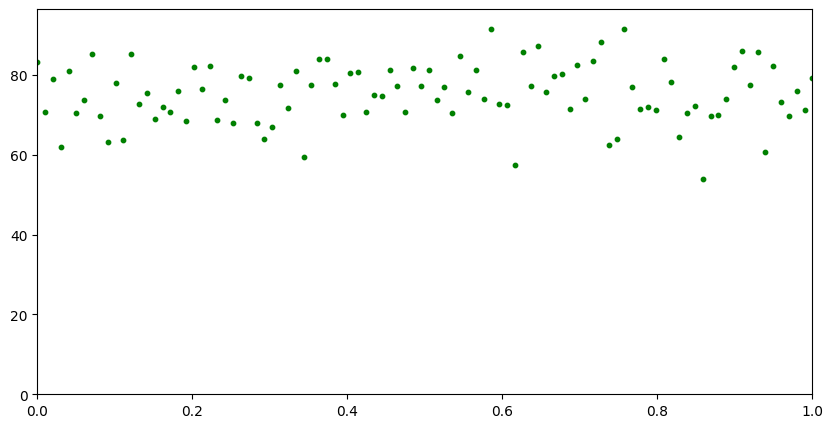

In [35]:
fig = plt.figure(figsize=[10,5])
ax = fig.add_subplot()

ax.scatter(df_by_score['Spending Score'], df_by_score['Annual Income'], s=10, c='green')
ax.set_xlim(0,df_by_score['Spending Score'].max())
ax.set_ylim(0,df_by_score['Annual Income'].max()+5)
#ax.scatter(df_mall['Spending Score'], df_mall['Annual Income'], s=50, c='blue')
#ax.plot(X_test, y_test, lw=10, c='orange')
#ax.plot(X_val, y_val, lw=5, c='red')
#ax.plot(X_val, y_pred_neigh, lw=2, c='yellow')